# 2 Compresión de Imágenes

In [28]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
import os

**1. ¿El formato BMP es un formato de compresion?**  


No, el formato BMP es un formato propio del sistema operativo Windows, se trata de un mapa de bits (matriz) que puede guardar imágenes de hasta 24 bits. Normalmente, se caracterizan por ser muy poco eficientes en su uso de espacio en disco, pero pueden mostrar un buen nivel de calidad, ya que guardan exactamente la imagen representada sin perdida de información.

**2. (*) Dar detalles de las siguientes métricas de calidad de compresión (PSNR, SSIM)**  

PSNR: La relación señal-ruido máxima (PSNR) es una métrica de referencia completa no lineal que compara los valores de los píxeles de la imagen de referencia original con los de la imagen degradada. Para calcular la PSNR, primero se debe calcular el error cuadrático medio (MSE). Cuanto menor sea el MSE, menor será el error y mayores serán los resultados de la PSNR. La idea principal es que cuanto mayor sea la puntuación de la PSNR, mejor se habrá reconstruido la imagen degradada en comparación con la imagen de referencia, lo que a su vez significa que el algoritmo utilizado para la reconstrucción también es mejor. 
Sin embargo, la mayor desventaja que presenta PSNR es que sus puntuaciones no siempre se correlacionan con la calidad percibida. Un área común donde se aprecia esto es en la borrosidad, donde por ejemplo si se tienen dos imágenes identicas salvando que una es mas borrosa generalmente presentan un puntaje similar.  

SSIM: El índice de similitud estructural (SSIM) es una métrica de referencia completa no lineal que compara la luminancia, el contraste y la estructura de la imagen original y la degradada. En otras palabras, SSIM mide las diferencias entre las propiedades (luminancia, contraste y estructura) de los píxeles  
El SSIM se mide en una escala de 0 a 1, donde cuanto más cercana sea la puntuación a 1, más similar será la imagen degradada a la imagen de referencia. Como se mencionó anteriormente, el SSIM es una métrica no lineal: los resultados de 0,97 a 1 indican una degradación mínima, los de 0,95 a 0,97 representan una degradación baja y los resultados por debajo de estos rangos indican una degradación media o alta.  
SSIM es muy sensible a cualquier tipo de cambio estructural, como el estiramiento de una imagen, rotaciones o distorsiones similares. También se ve muy afectado por los bloques y el desenfoque.  
Como desventaja, SSIM no es bueno para evaluar cambios en el tono de la imagen y factores similares.

**3. ¿Cuál es el impacto de la compresión en el procesamiento posterior de una imagen?**  
La compresión post-procesamiento impacta en primer lugar generando una pérdida de información, esto puede eliminar bordes suaves, texturas sutiles o detalles importantes, que son claves para muchos algoritmos. Por otro lado, JPEG y otros códecs pueden introducir bloques visibles o "pixelado" (especialmente a bajas calidades), banding (transiciones no suaves) y ruido o distorsiones cromáticas. Estos artefactos confunden a modelos de machine learning o procesos como filtrado, umbralización, etc.

**4. Cargar una imagen en color. Guarda la imagen con diferentes niveles de calidad (ejemplo: 90%, 50%,
10%). Comparar el tamaño, resolución, calidad, profundidad de bits de los archivos y la pérdida de
calidad. ¿Qué puede comentar de las imágenes resultantes?**  


Las imágenes resultantes mantienen la resolución y profundidad de bit de la orignal. En las compresiones de 50% y 10% el tamaño disminuye con respecto al original pero para la compresión de 90% el tamaño es mayor.  
Para la medición de la calidad las métricas PSNR Y SSIM se correlacionan con la disminusión de la calidad, teniendo un puntaje de PSNR: 42.26 y SSIM: 0.9992 para la calidad del 90%, lo cual indica que es casi indisntinguible de la original, y valores menores para las calidades de 50% y 10%

In [29]:
def show_image(image, title=None):
    """Display an image using matplotlib."""
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    if title:
        plt.title(title)
    plt.axis('off')
    plt.show()

In [30]:
# Función para comparar dos imágenes
def comparar_imagenes(original_path, comprimida_path):
    print(f"\nComparando: {original_path} vs {comprimida_path}")

    # Tamaño del archivo
    size_original = os.path.getsize(original_path)
    size_comprimida = os.path.getsize(comprimida_path)
    print(f"Tamaño original: {size_original / 1024:.2f} KB")
    print(f"Tamaño comprimida: {size_comprimida / 1024:.2f} KB")

    # Cargar imágenes con OpenCV (en escala de grises para SSIM)
    img1 = cv2.imread(original_path)
    img2 = cv2.imread(comprimida_path)

    altura1, ancho1 = img1.shape[:2]
    print(f"Resolución original: {ancho1} x {altura1}")

    altura2, ancho2 = img2.shape[:2]
    print(f"Resolución comprimida: {ancho2} x {altura2}")

    img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    # Redimensionar si difieren
    if img1.shape != img2.shape:
        img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))
        img2_gray = cv2.resize(img2_gray, (img1.shape[1], img1.shape[0]))

    # Calcular PSNR y SSIM
    valor_psnr = psnr(img1, img2)
    valor_ssim = ssim(img1_gray, img2_gray)

    print(f"PSNR: {valor_psnr:.2f} dB")
    print(f"SSIM: {valor_ssim:.4f}")


    #Profundidad de bits
    bits_por_canal = img1.dtype.itemsize * 8 
    canales = img1.shape[2] if len(img1.shape) == 3 else 1
    profundidad_bits_original = bits_por_canal * canales

    bits_por_canal = img2.dtype.itemsize * 8 
    canales = img2.shape[2] if len(img2.shape) == 3 else 1
    profundidad_bits_comprimida = bits_por_canal * canales

    print(f"Profundidad original: {profundidad_bits_original} bits por píxel")
    print(f"Profundidad comprimida: {profundidad_bits_comprimida} bits por píxel")

    


Comparando: paisaje2.jpg vs cv2_95.jpg
Tamaño original: 34.88 KB
Tamaño comprimida: 52.90 KB
Resolución original: 350 x 350
Resolución comprimida: 350 x 350
PSNR: 42.26 dB
SSIM: 0.9992
Profundidad original: 24 bits por píxel
Profundidad comprimida: 24 bits por píxel

Comparando: paisaje2.jpg vs cv2_50.jpg
Tamaño original: 34.88 KB
Tamaño comprimida: 30.79 KB
Resolución original: 350 x 350
Resolución comprimida: 350 x 350
PSNR: 28.83 dB
SSIM: 0.9644
Profundidad original: 24 bits por píxel
Profundidad comprimida: 24 bits por píxel

Comparando: paisaje2.jpg vs cv2_10.jpg
Tamaño original: 34.88 KB
Tamaño comprimida: 9.14 KB
Resolución original: 350 x 350
Resolución comprimida: 350 x 350
PSNR: 21.73 dB
SSIM: 0.7465
Profundidad original: 24 bits por píxel
Profundidad comprimida: 24 bits por píxel


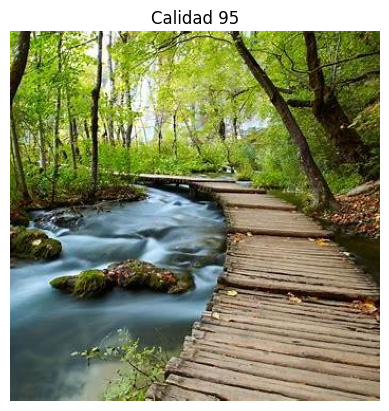

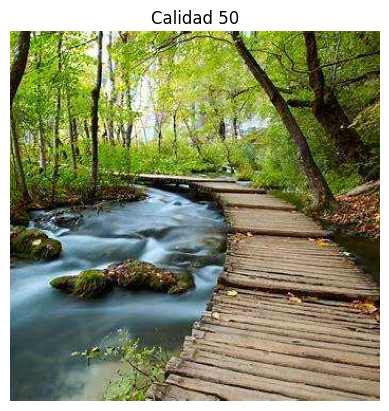

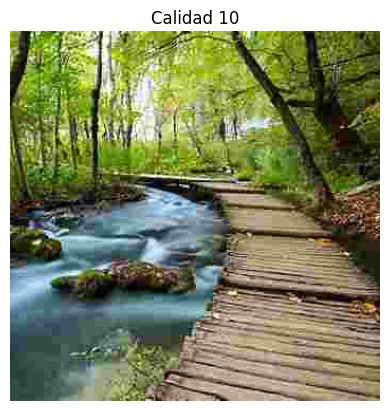

In [ ]:
img = cv2.imread("paisaje2.jpg")

# Guardamos con diferentes calidades
cv2.imwrite("cv2_90.jpg", img, [int(cv2.IMWRITE_JPEG_QUALITY), 90])
cv2.imwrite("cv2_50.jpg", img, [int(cv2.IMWRITE_JPEG_QUALITY), 50])
cv2.imwrite("cv2_10.jpg", img, [int(cv2.IMWRITE_JPEG_QUALITY), 10])

comparar_imagenes("paisaje2.jpg", "cv2_90.jpg")
comparar_imagenes("paisaje2.jpg", "cv2_50.jpg")
comparar_imagenes("paisaje2.jpg", "cv2_10.jpg")

# Leemos las imágenes
img_95 = cv2.imread("cv2_90.jpg")
img_50 = cv2.imread("cv2_50.jpg")
img_20 = cv2.imread("cv2_10.jpg")

# Mostramos las imágenes
show_image(img_95, "Calidad 90")
show_image(img_50, "Calidad 50")
show_image(img_20, "Calidad 10")

5. Guardar una imagen en formato PNG con distintos niveles de compresi´on (0 a 9). Comparar el
tama˜no de los archivos generados.

6. (*) Implementar un modelo de compresi´on basado en codificaci´on Run-Length Encoding (RLE). El
algoritmo Run-Length Encoding (RLE) reduce el tama˜no de una imagen representando secuencias
consecutivas de p´ıxeles id´enticos como una sola entrada. Para ello convertir una imagen en escala de
grises. luego, implementar el algoritmo RLE para comprimir la imagen. Posteriormente, implementar
una funci´on para descomprimir la imagen. Al finalizar, mostrar la imagen original y la imagen
reconstruida. Probar con dos o tres imagenes que tengan diferentes caracter´ısticas, modos de color.
utilizar alguna de las metricas nombradas anteriormente e evaluar el resultado de la misma.